# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.collections import LineCollection
import seaborn as sns
import re 
from math import sqrt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pip
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

[nltk_data] Downloading package stopwords to /home/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sarah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/sarah/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
final_data= pd.read_csv('final_data.csv')

# ETAPE 4 : Analyse exploratoire – Analyse univariée et bi-variée

Analyse univariée

In [3]:
# Afficher les statistiques descriptives
final_data.describe()

,code,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,4.061499e+12,1090.052565,13.296895,5.367082,27.192448,13.217974,2.669168,7.690200,1.201631,0.473078,8.416637
std,1.277638e+13,694.857544,12.798055,7.647182,20.650692,16.680499,4.026729,6.834751,3.741513,1.473033,7.898227
min,2.484600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,3.242278e+12,515.000000,4.500000,0.500000,11.200000,1.700000,1.000000,2.800000,0.120000,0.047244,2.000000
50%,3.330720e+12,1090.155709,13.321027,3.700000,27.203713,10.000000,2.669168,7.600000,0.950000,0.374016,8.414159
75%,3.700125e+12,1507.000000,13.321027,5.365748,27.203713,13.215154,2.669168,9.000000,1.201317,0.472955,13.000000
max,6.091303e+14,5732.000000,100.000000,95.000000,100.000000,100.000000,100.000000,84.200000,93.600000,36.850394,32.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     3799 non-null   int64  
 1   product_name             3799 non-null   object 
 2   nutrition_grade_fr       3799 non-null   object 
 3   pnns_groups_1            3799 non-null   object 
 4   energy_100g              3799 non-null   float64
 5   fat_100g                 3799 non-null   float64
 6   saturated-fat_100g       3799 non-null   float64
 7   carbohydrates_100g       3799 non-null   float64
 8   sugars_100g              3799 non-null   float64
 9   fiber_100g               3799 non-null   float64
 10  proteins_100g            3799 non-null   float64
 11  salt_100g                3799 non-null   float64
 12  sodium_100g              3799 non-null   float64
 13  nutrition-score-fr_100g  3799 non-null   float64
dtypes: float64(10), int64(1)

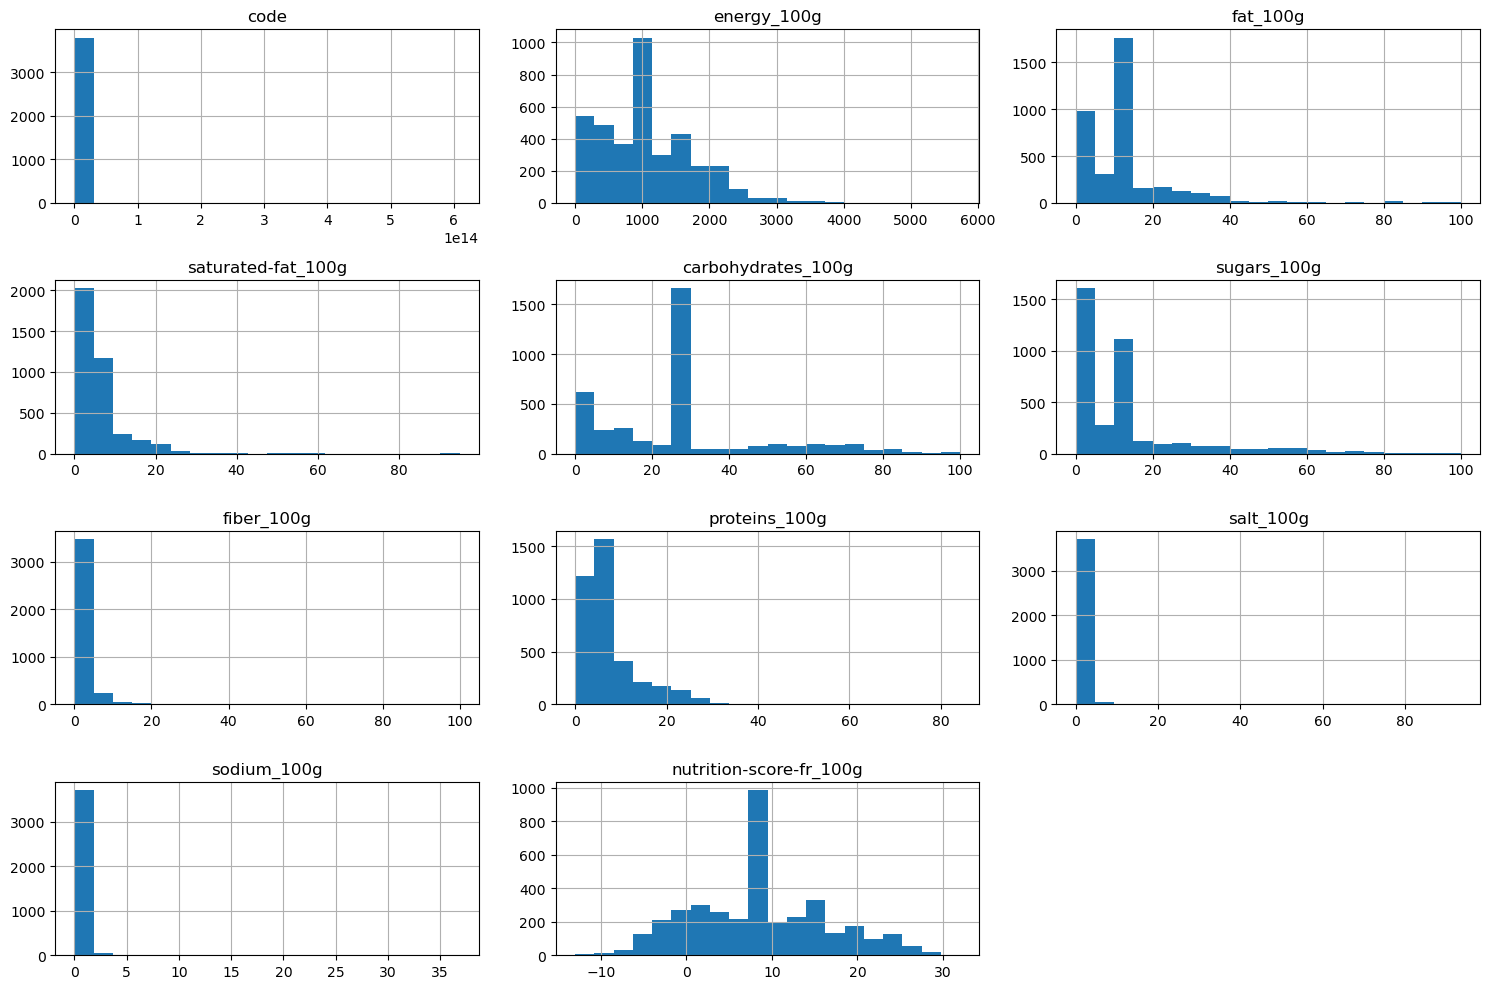

In [4]:
# Afficher les informations sur les types de données et les valeurs manquantes
info = final_data.info()

# Générer des histogrammes pour chaque variable numérique
numeric_features = final_data.select_dtypes(include=['float64', 'int64'])
numeric_features.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


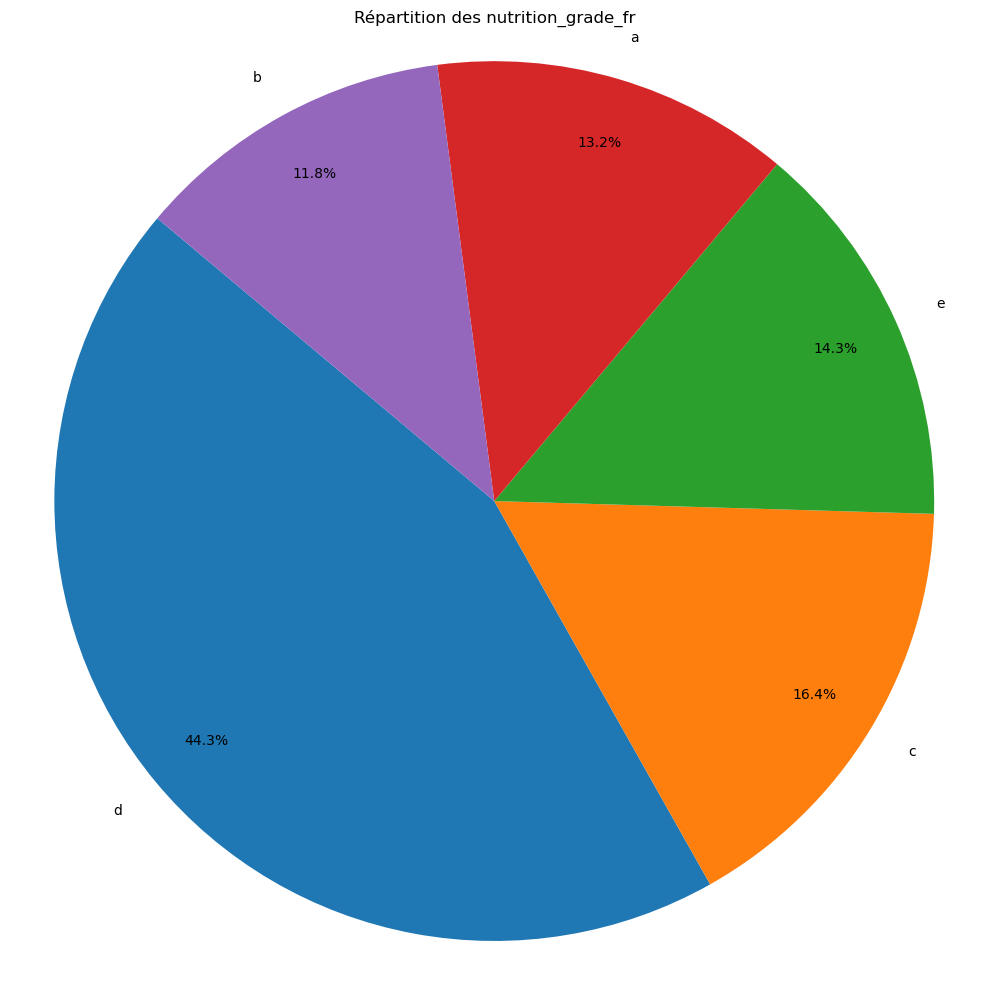

In [5]:
# Compter les occurrences de chaque nutrition_grade_fr
product_name_counts = final_data['nutrition_grade_fr'].value_counts()

# Limiter le nombre de catégories pour une meilleure visualisation (facultatif)
top_product_names = product_name_counts.head(10)  # Changez le nombre de catégories selon vos besoins

# Créer un camembert
plt.figure(figsize=(10, 10))
plt.pie(top_product_names, labels=top_product_names.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')

# Ajouter un titre
plt.title('Répartition des nutrition_grade_fr')

# Afficher le camembert
plt.axis('equal')
plt.tight_layout()
plt.show()

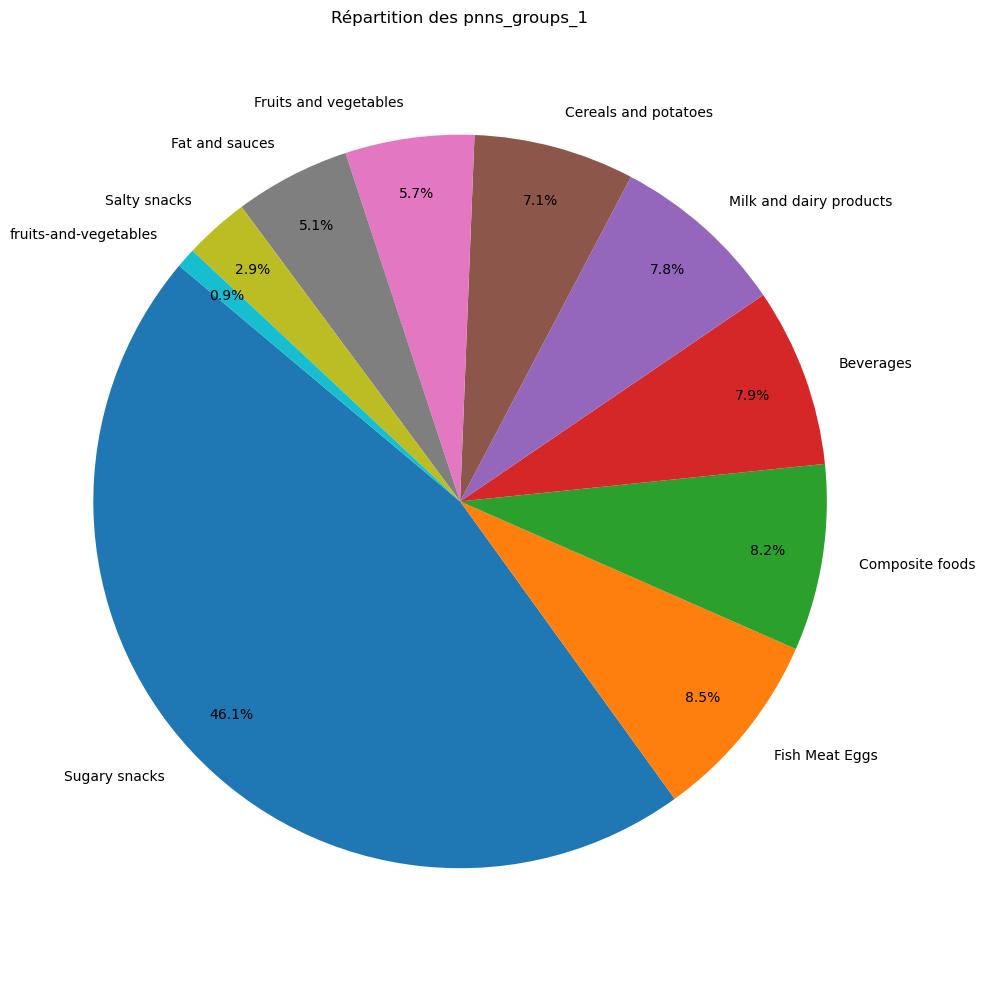

In [6]:
# Compter les occurrences de chaque pnns_groups_1
product_name_counts = final_data['pnns_groups_1'].value_counts()

# Limiter le nombre de catégories pour une meilleure visualisation (facultatif)
top_product_names = product_name_counts.head(10)  # Changez le nombre de catégories selon vos besoins

# Créer un camembert
plt.figure(figsize=(10, 10))
plt.pie(top_product_names, labels=top_product_names.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')

# Ajouter un titre
plt.title('Répartition des pnns_groups_1')

# Afficher le camembert
plt.axis('equal')
plt.tight_layout()
plt.show()

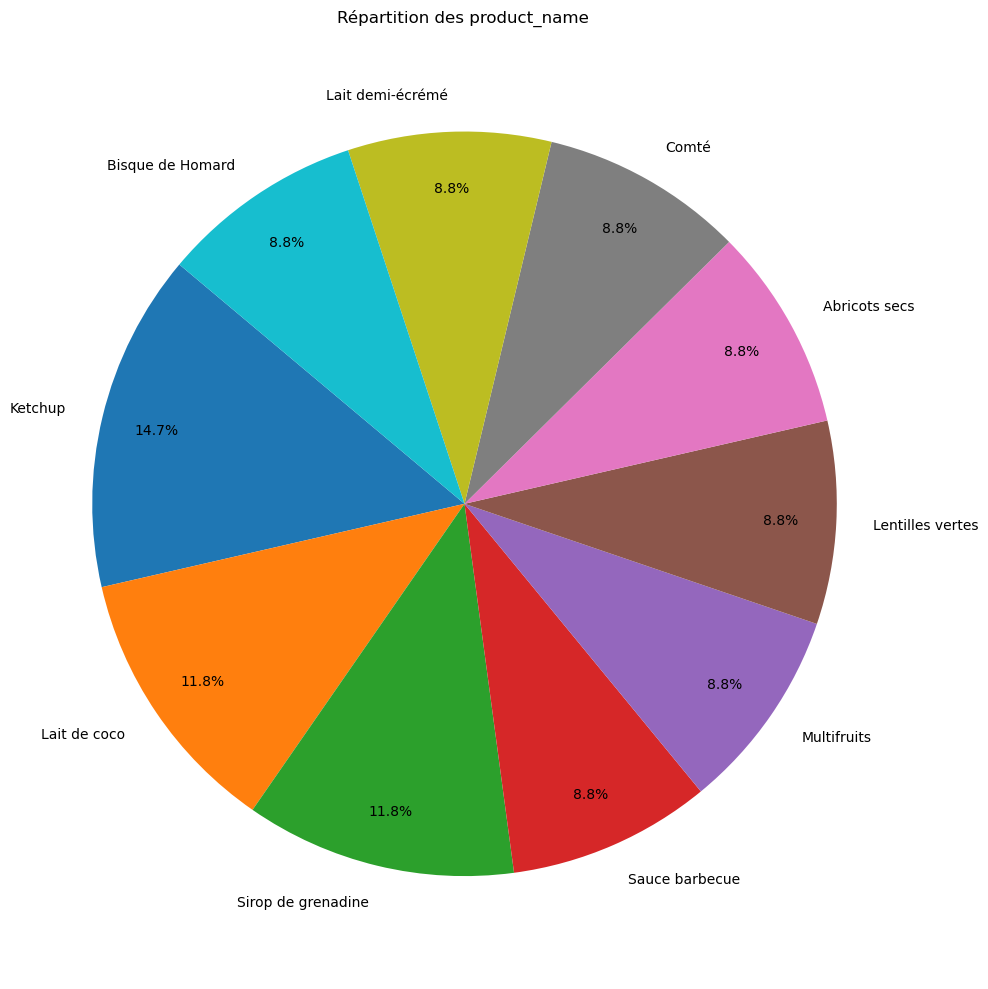

In [7]:
# Compter les occurrences de chaque product_name
product_name_counts = final_data['product_name'].value_counts()

# Limiter le nombre de catégories pour une meilleure visualisation (facultatif)
top_product_names = product_name_counts.head(10)  # Changez le nombre de catégories selon vos besoins

# Créer un camembert
plt.figure(figsize=(10, 10))
plt.pie(top_product_names, labels=top_product_names.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')

# Ajouter un titre
plt.title('Répartition des product_name')

# Afficher le camembert
plt.axis('equal')
plt.tight_layout()
plt.show()

Analyse bi-variée

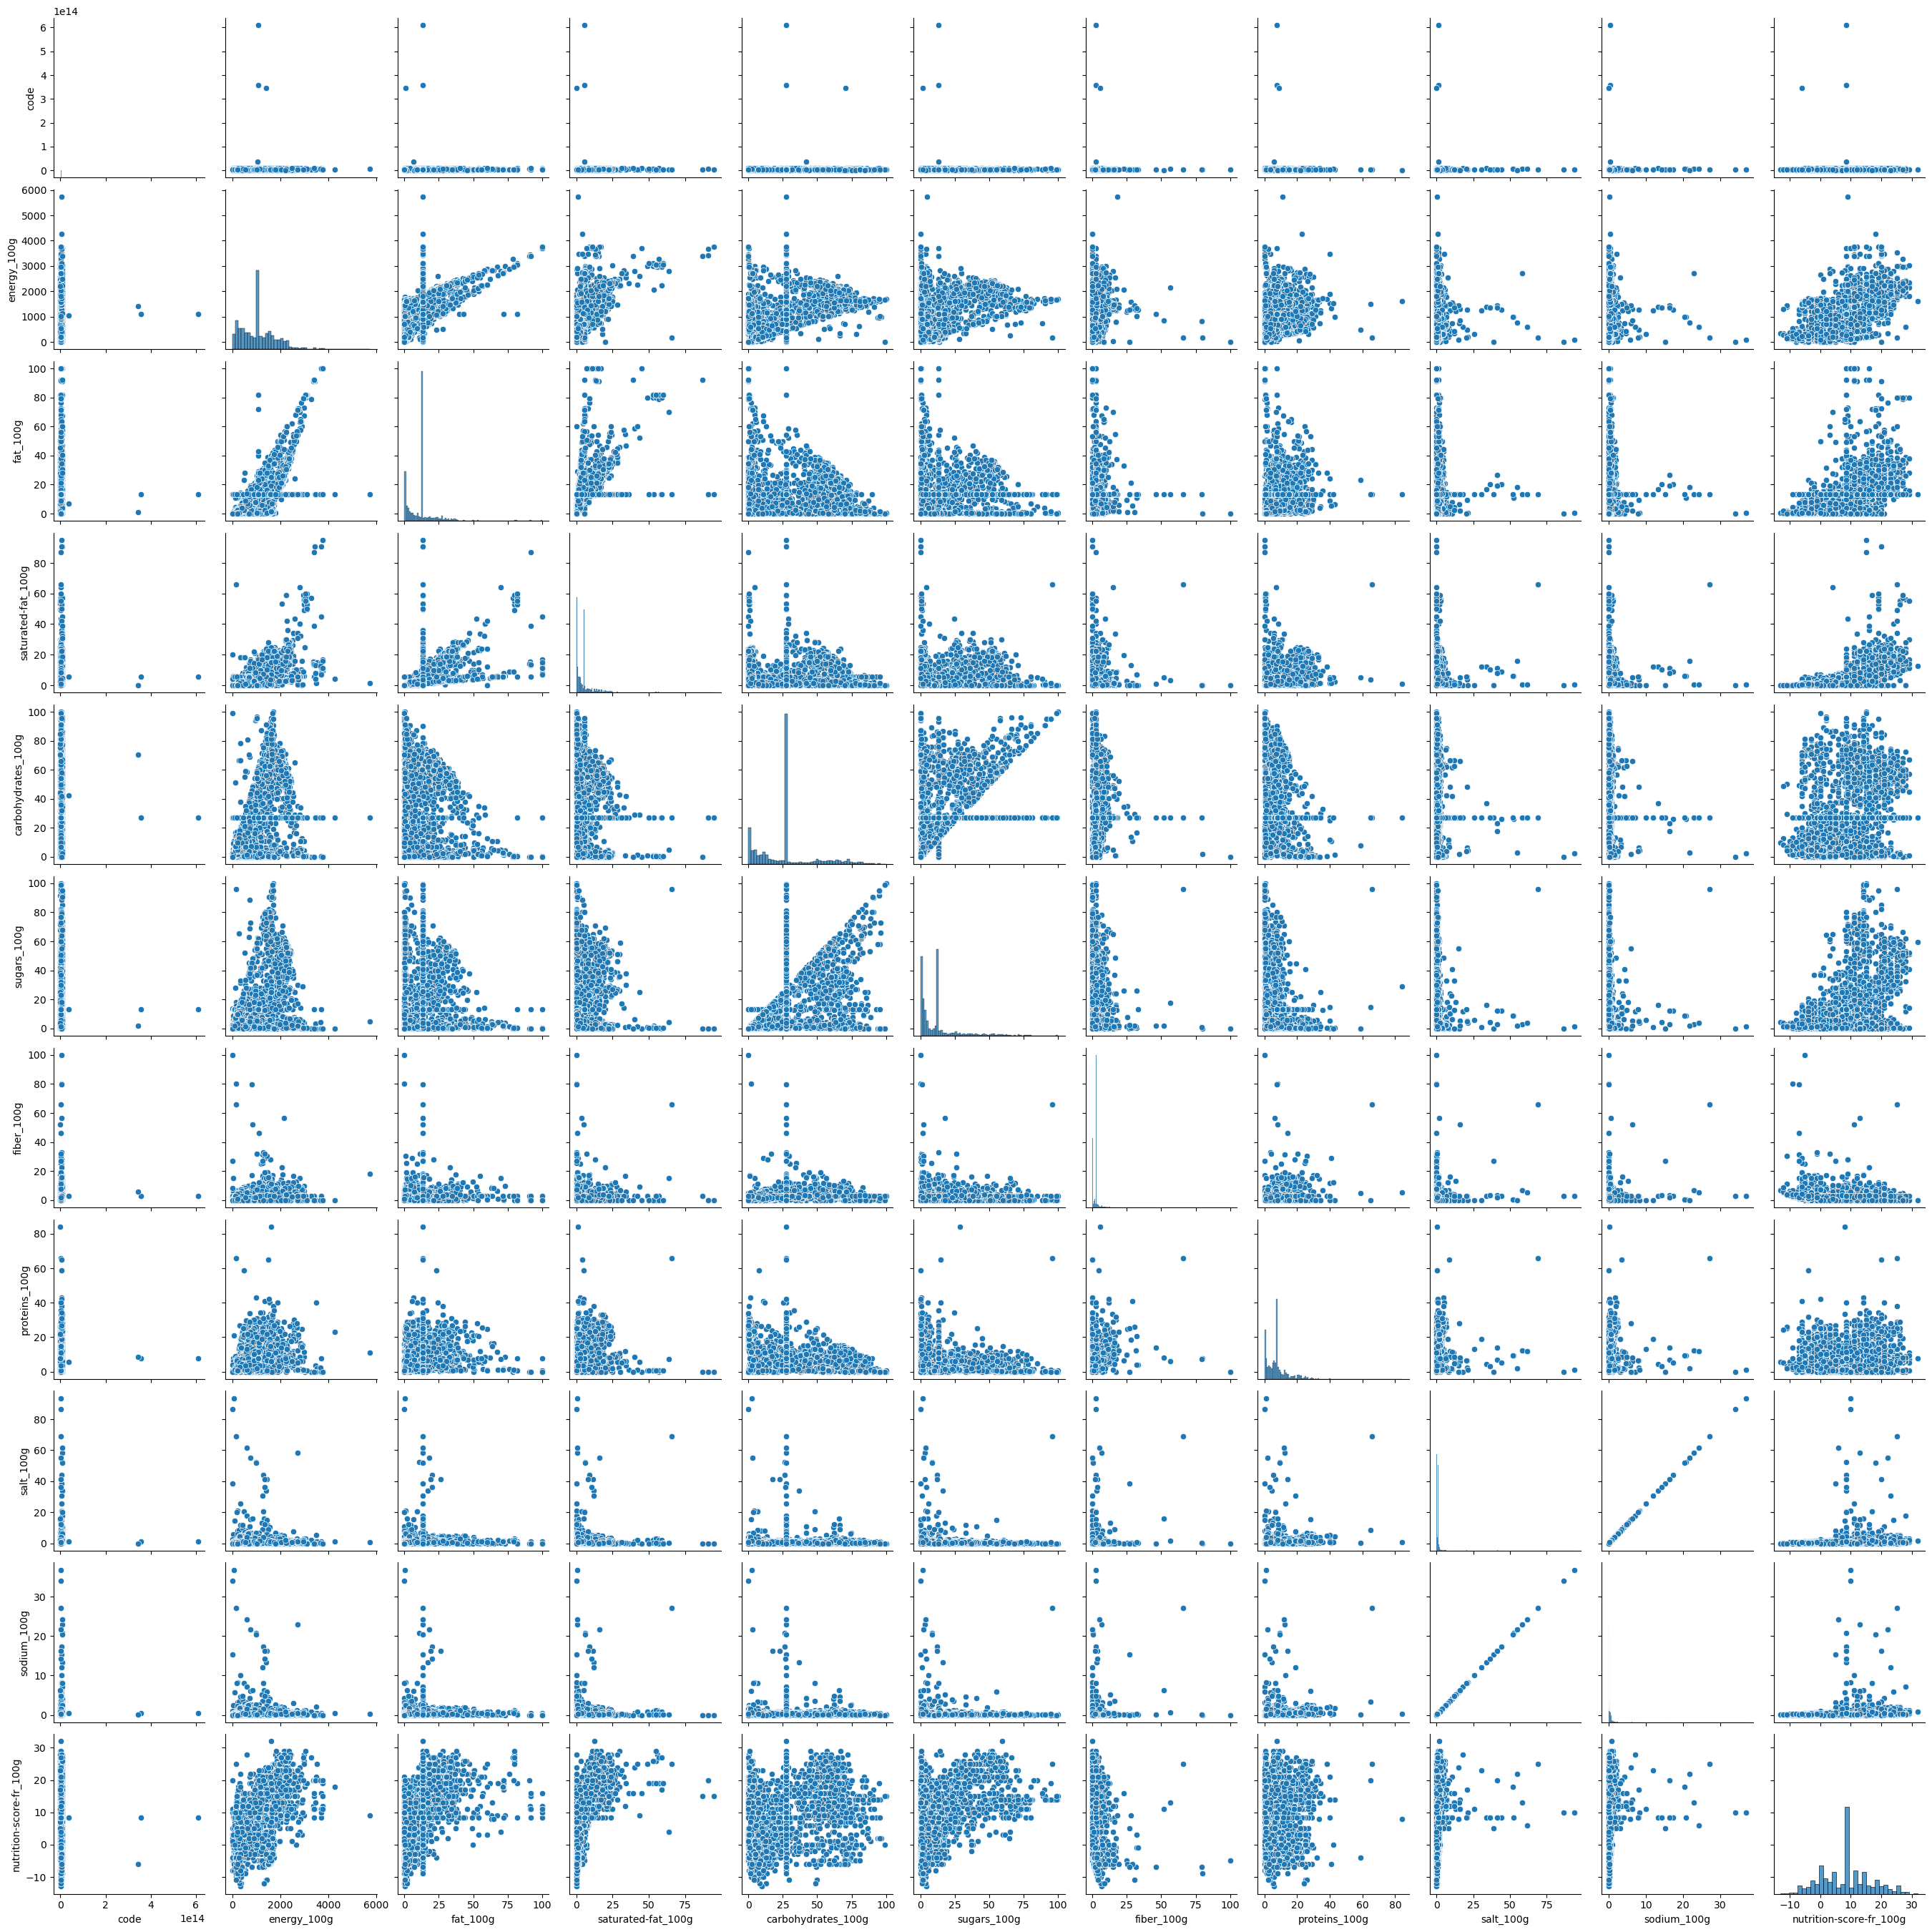

In [8]:
# Pairplot
sns.pairplot(final_data)
plt.show()

In [9]:
#nettoyage a faire apres observation saturated fat fat et carbohydrate sugar

In [10]:
# Filtrer les lignes où saturated-fat_100g est supérieur à fat_100g
filtered_products = final_data[final_data['saturated-fat_100g'] > final_data['fat_100g']]
filtered_products.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,3596710262823,Coquillettes,d,Cereals and potatoes,1523.0,1.900000,5.365748,73.000000,13.215154,2.669168,11.5,1.201317,0.472955,8.414159
44,34000441082,Hersheys Reeses Peanut Butter Cups 4 Pack,e,Sugary snacks,2251.0,13.321027,29.900000,27.203713,50.900000,0.000000,10.9,0.900000,0.354331,29.000000
59,3660992003136,Purée de tomates,d,Fat and sauces,107.0,0.100000,5.365748,3.800000,13.215154,2.669168,1.8,1.201317,0.472955,8.414159
77,5412322600007,Gallets Dessert fondant chocolat,e,Sugary snacks,2167.0,13.321027,19.300000,27.203713,46.900000,0.000000,5.4,0.020000,0.007874,26.000000
104,3144550019338,Miel de fleur d'oranger,d,Sugary snacks,1352.0,0.000000,5.365748,80.000000,80.000000,0.000000,0.4,0.006000,0.002362,8.414159


In [11]:
# Filtrer les lignes où sugars_100g est supérieur à carbohydrates_100g dans le DataFrame final_data
filtered_products_sugar = final_data[final_data['sugars_100g'] > final_data['carbohydrates_100g']]
filtered_products_sugar.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,3660140891752,Pain d'épices au,d,Sugary snacks,1289.0,13.321027,0.1,27.203713,43.0,2.10,3.0,0.77,0.303150,13.0
2,3250391979448,", Crêpes pur beurre, les 10 crêpes de 30 g",e,Sugary snacks,1611.0,13.321027,12.6,27.203713,59.6,0.00,7.7,1.88,0.740157,32.0
8,3174061050001,Valade,d,Sugary snacks,828.0,13.321027,0.5,27.203713,45.5,0.01,0.5,0.05,0.019685,12.0
31,5412971116072,Pur Natur BIO,b,Milk and dairy products,314.0,3.800000,2.4,5.400000,5.7,0.00,4.3,0.10,0.039370,1.0
44,34000441082,Hersheys Reeses Peanut Butter Cups 4 Pack,e,Sugary snacks,2251.0,13.321027,29.9,27.203713,50.9,0.00,10.9,0.90,0.354331,29.0


In [12]:
# Supprimer les lignes où saturated-fat_100g est supérieur à fat_100g
final_data = final_data[final_data['saturated-fat_100g'] <= final_data['fat_100g']]
# Supprimer les lignes où sugars_100g est supérieur à carbohydrates_100g
final_data = final_data[final_data['sugars_100g'] <= final_data['carbohydrates_100g']]

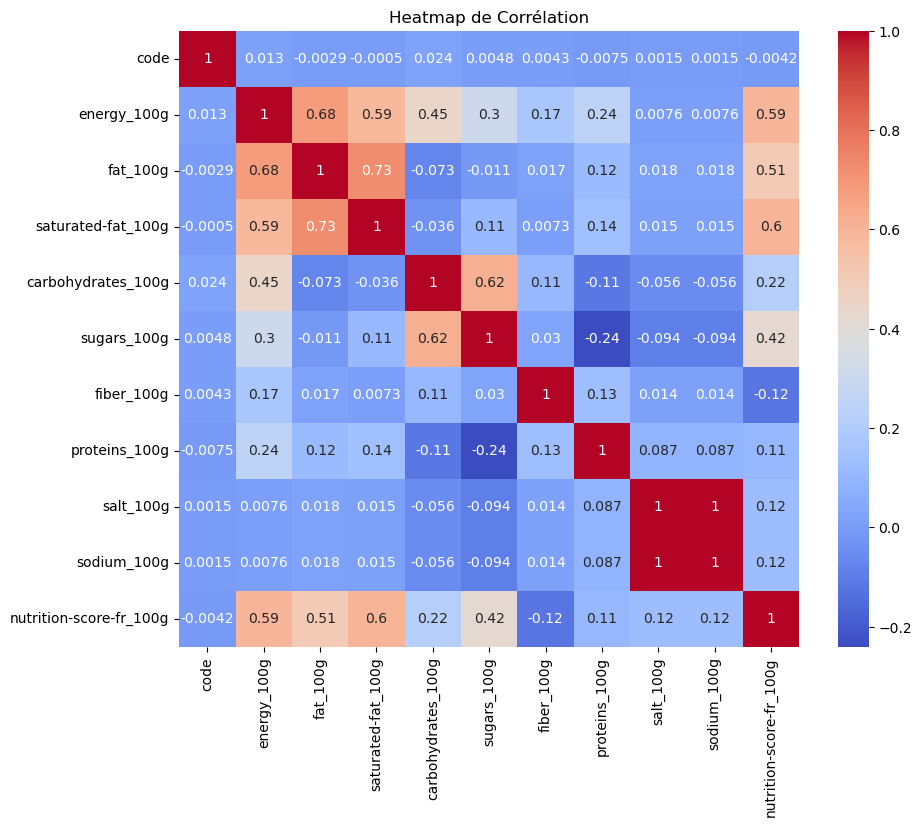

In [13]:
# Heatmap de corrélation
corr_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Corrélation')
plt.show()

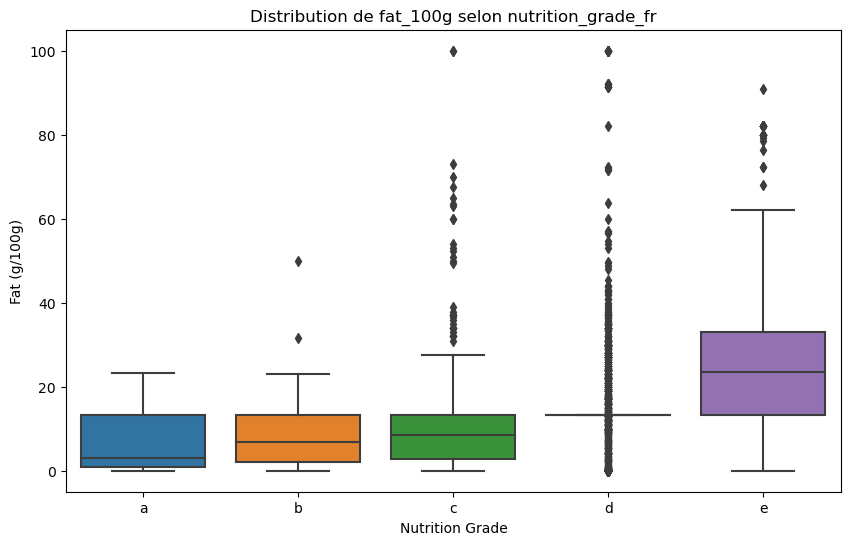

In [14]:
# Boxplot de 'fat_100g' en fonction de 'nutrition_grade_fr'
plt.figure(figsize=(10, 6))
sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=final_data, order=['a', 'b', 'c', 'd', 'e'])
plt.title('Distribution de fat_100g selon nutrition_grade_fr')
plt.xlabel('Nutrition Grade')
plt.ylabel('Fat (g/100g)')
plt.show()

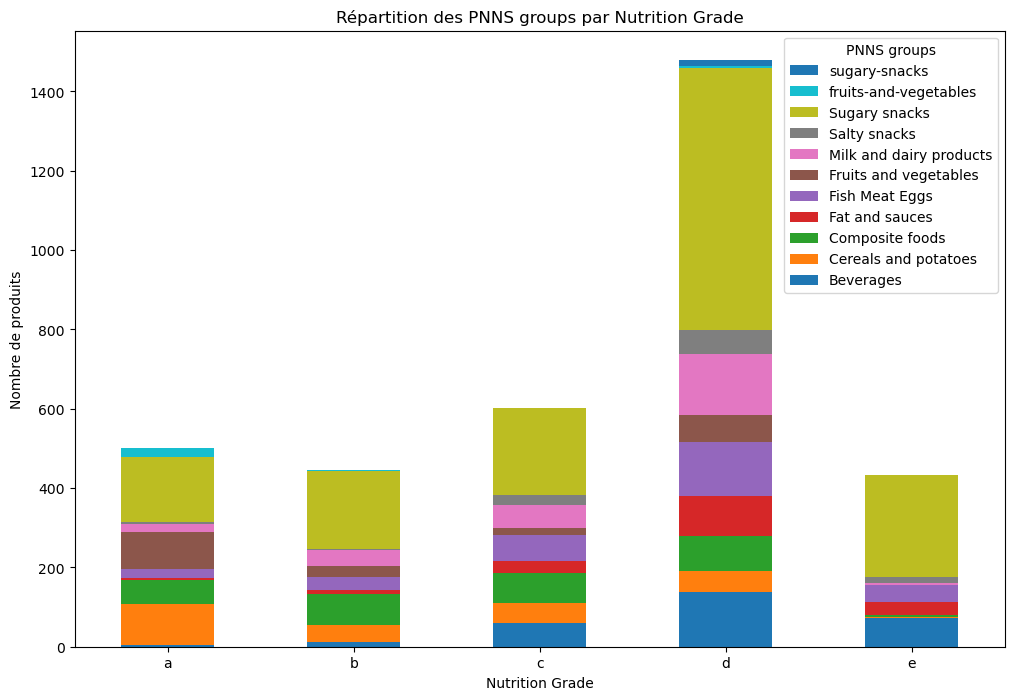

In [15]:
# Compter le nombre de PNNS groups par nutrition_grade_fr
count_pnns_by_grade = final_data.groupby(['nutrition_grade_fr', 'pnns_groups_1']).size().unstack(fill_value=0)

# Créer un graphique à barres empilées
ax = count_pnns_by_grade.plot(kind='bar', stacked=True, figsize=(12, 8))

# Ajouter des légendes
plt.title('Répartition des PNNS groups par Nutrition Grade')
plt.xlabel('Nutrition Grade')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=0)  

# Ajouter une légende personnalisée
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='PNNS groups')

plt.show()

# ETAPE 5 : Analyse exploratoire – Analyse multi-variée

Nous allons réaliser une ACP 

In [16]:
# Sélectionnez les colonnes numériques pour l'ACP
numeric_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
    'nutrition-score-fr_100g'
]

In [17]:
# Standardisez les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data[numeric_features])
# On transforme
X_scaled = scaler.transform(final_data[numeric_features])
# Appliquez l'ACP
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

In [18]:
# La variance captée par chaque nouvelle composante.
pca.explained_variance_ratio_
#Ici la 1ère composante capte 43% de la variance de nos données initiales, la 2ème 17% etc.

array([3.05877244e-01, 2.10610206e-01, 1.68023510e-01, 1.18306904e-01,
       8.20836505e-02, 5.13655016e-02, 2.72107931e-02, 2.48679045e-02,
       1.16542858e-02, 3.00910142e-10])

In [19]:
# Enregister cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.59, 21.06, 16.8 , 11.83,  8.21,  5.14,  2.72,  2.49,  1.17,
        0.  ])

In [20]:
#Pour faire une somme cumulée numpy dispose de la fonction cumsum :
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  52.,  68.,  80.,  88.,  94.,  96.,  99., 100., 100.])

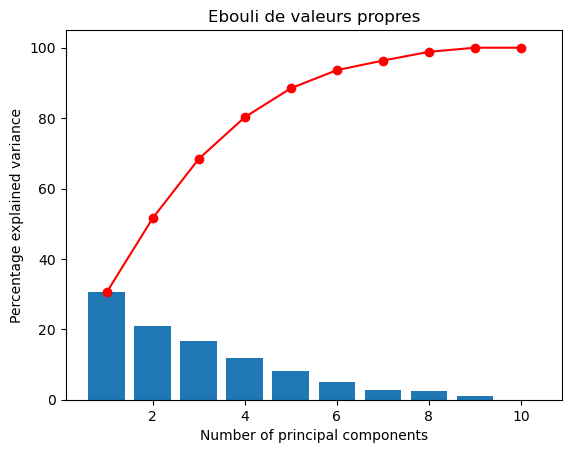

In [21]:
# Scree plot
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Ebouli de valeurs propres")
    plt.show(block=False)
#Utilisation de la fonction pour tracer le scree plot
display_scree_plot(pca) 

In [22]:
#Nombre de composantes qui concentrent près de 60% de la variance
np.argmax(np.cumsum(pca.explained_variance_ratio_*100)>= 60)

2

In [23]:
# Le nombre de composantes à étudier est donc de 2
num_components = 2

In [24]:
#Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = pca.components_

In [25]:
#Affichons la même chose mais version pandas principal components :
pcs = pd.DataFrame(pcs)
pcs
#On arrondit pour plus de clarté et in rajoute le nom des colonnes
nomdescolonnes=numeric_features
pcs.columns = nomdescolonnes
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0.51,0.44,0.46,0.20,0.24,0.04,0.11,0.05,0.05,0.47
1,-0.05,0.08,0.06,-0.28,-0.31,-0.01,0.20,0.62,0.62,0.02
2,0.00,-0.32,-0.27,0.53,0.51,0.04,-0.28,0.32,0.32,0.07
3,0.21,-0.09,-0.13,0.20,-0.08,0.77,0.49,-0.02,-0.02,-0.23
4,-0.05,0.26,0.18,-0.18,-0.03,0.53,-0.74,0.05,0.05,-0.17
5,-0.40,-0.30,0.19,-0.45,0.43,0.29,0.16,-0.04,-0.04,0.45
6,-0.18,-0.18,0.73,0.19,0.18,-0.11,0.13,0.05,0.05,-0.55
7,0.06,0.46,-0.29,-0.34,0.61,-0.10,0.17,0.04,0.04,-0.42
8,0.70,-0.53,0.05,-0.42,0.06,-0.07,-0.14,0.01,0.01,-0.13
9,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.71,-0.71,-0.00


In [26]:
#Cercles de corrélation et projections des individus

In [27]:
#Fonction pour afficher la projection des individus
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

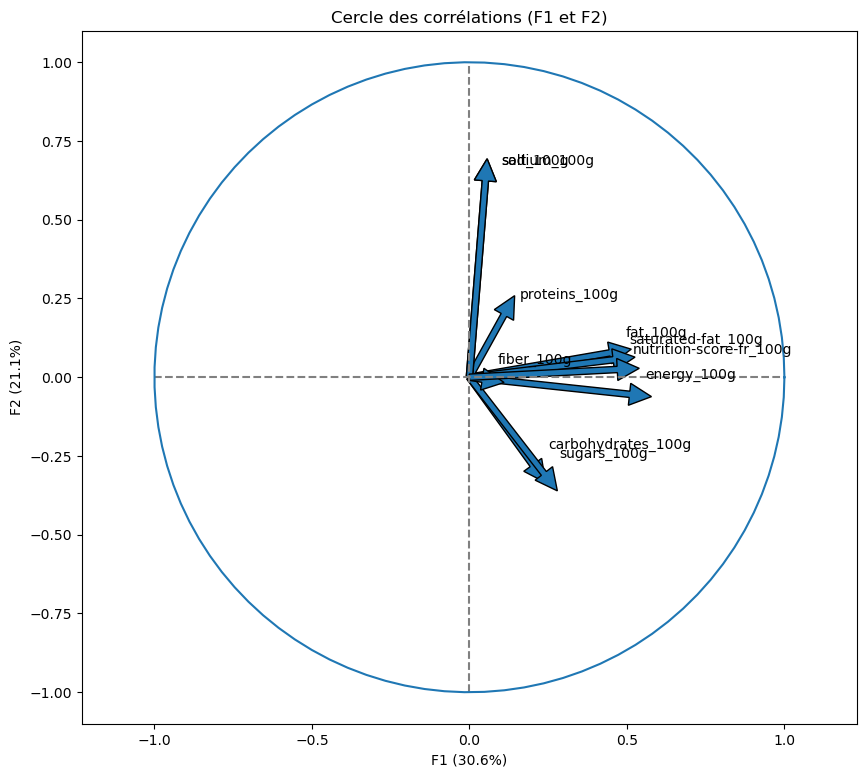

In [28]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :
x, y = 0,1
#Pour la partie graphique :

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             nomdescolonnes[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
# Ajouter un unit circle for scale
plt.axis('equal')
plt.show(block=False)

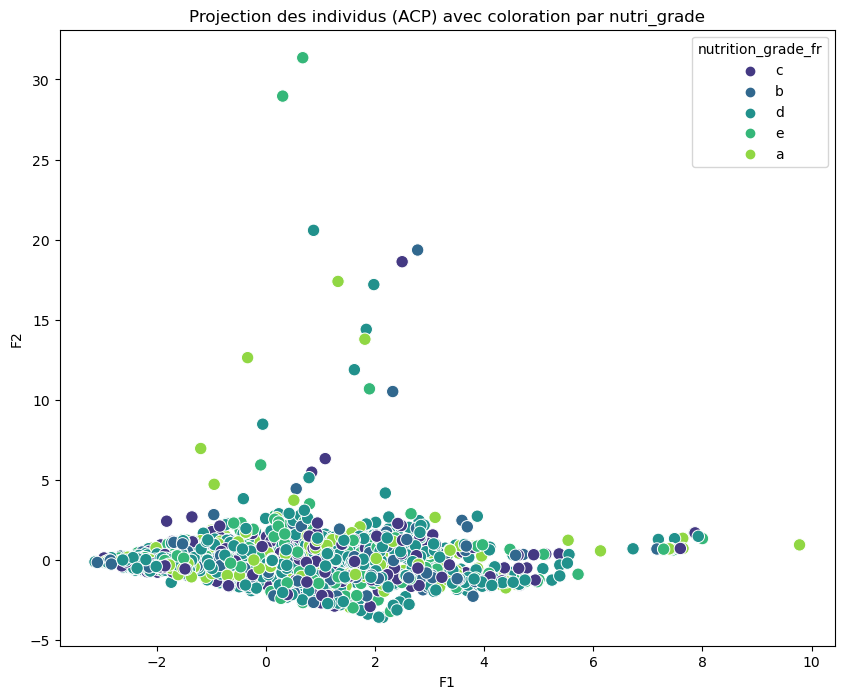

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Supposons que X_scaled contient vos données préalablement mises à l'échelle
# Assurez-vous que X_scaled ne contient que des variables numériques

# Instanciation de l'objet PCA
pca = PCA(n_components=2)

# Calcul des coordonnées dans le nouvel espace
X_proj = pca.fit_transform(X_scaled)

# Ajout de la colonne 'nutri_grade' à X_proj
X_proj_with_labels = pd.concat([pd.DataFrame(X_proj, columns=['F1', 'F2']), final_data['nutrition_grade_fr']], axis=1)

# Affichage du nuage de points avec coloration par nutri_grade
plt.figure(figsize=(10, 8))
sns.scatterplot(x='F1', y='F2', hue='nutrition_grade_fr', data=X_proj_with_labels, palette='viridis', s=80)
plt.title('Projection des individus (ACP) avec coloration par nutri_grade')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()


In [30]:
#verifier la normalite des donnnes par un test et si pas normal les normaliser avant anova

In [31]:
from scipy.stats import shapiro

# Sélectionner toutes les variables quantitatives
variables_quantitatives = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                            'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

# Sélectionner l'échantillon pour toutes les variables quantitatives
all_samples = final_data[variables_quantitatives].dropna()

# Test de normalité de Shapiro-Wilk sur l'ensemble du jeu de données
stat, p_value = shapiro(all_samples)

# Afficher le résultat du test de normalité
print(f"\nTest de normalité de Shapiro-Wilk sur l'ensemble du jeu de données:")
print("Statistique de test W :", stat)
print("Valeur p :", p_value)

if p_value < 0.05:
    print("L'ensemble du jeu de données ne suit pas une distribution normale.")
else:
    print("L'ensemble du jeu de données suit une distribution normale.")



Test de normalité de Shapiro-Wilk sur l'ensemble du jeu de données:
Statistique de test W : 0.32854175567626953
Valeur p : 0.0
L'ensemble du jeu de données ne suit pas une distribution normale.


In [32]:
from scipy.stats import kruskal

# Sélectionner toutes les variables quantitatives
variables_quantitatives = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                            'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

# Sélectionner les variables qualitatives pour définir les groupes
variables_qualitatives = ['pnns_groups_1', 'nutrition_grade_fr']

# Boucle pour réaliser le test de Kruskal-Wallis pour chaque variable quantitative
for variable in variables_quantitatives:
    for qualitative_var in variables_qualitatives:
        # Sélectionner les catégories uniques de la variable qualitative
        categories = final_data[qualitative_var].unique()

        # Liste pour stocker les échantillons de chaque catégorie
        samples = [final_data[variable][final_data[qualitative_var] == category] for category in categories]

        # Test de Kruskal-Wallis
        kruskal_result = kruskal(*samples)

        # Afficher le résultat du test de Kruskal-Wallis
        print(f"\nTest de Kruskal-Wallis pour {variable} avec {qualitative_var}:")
        print("Statistique de test H :", kruskal_result.statistic)
        print("Valeur p :", kruskal_result.pvalue)

        if kruskal_result.pvalue < 0.05:
            print("Il y a des différences statistiquement significatives entre les groupes.")
        else:
            print("Il n'y a pas de différences statistiquement significatives entre les groupes.")



Test de Kruskal-Wallis pour energy_100g avec pnns_groups_1:
Statistique de test H : 744.0094109727842
Valeur p : 2.2236885555775245e-153
Il y a des différences statistiquement significatives entre les groupes.

Test de Kruskal-Wallis pour energy_100g avec nutrition_grade_fr:
Statistique de test H : 964.5521910877395
Valeur p : 1.7153322997209772e-207
Il y a des différences statistiquement significatives entre les groupes.

Test de Kruskal-Wallis pour fat_100g avec pnns_groups_1:
Statistique de test H : 727.4279505487273
Valeur p : 8.10299530480844e-150
Il y a des différences statistiquement significatives entre les groupes.

Test de Kruskal-Wallis pour fat_100g avec nutrition_grade_fr:
Statistique de test H : 893.3432837413268
Valeur p : 4.6124354081795895e-192
Il y a des différences statistiquement significatives entre les groupes.

Test de Kruskal-Wallis pour saturated-fat_100g avec pnns_groups_1:
Statistique de test H : 475.11276940295187
Valeur p : 9.136333883457978e-96
Il y a des